## ML Part 1-4. 스케일링(Scaling)
- 값의 스케일이 다른 두 개의 변수가 있을 때, 이 변수들의 스케일 차이를 제거해 주는 것

## 1.어떤 스케일러를 사용할 것인가?
- 데이터 모델링 전에 '스케일링' 과정이 필요함 
- '스케일링'을 통해 다차원의 값들을 비교 분석하기 쉽게 만듦
- 자료의 오버플로우(overflow), 언더플로우(underflow) 방지
- 독립 변수의 공분산 행렬의 조건수 (condition number)를 감소시켜 최적화 과정에서 안정성 및 수렴 속도를 향상시킴
- 특히 거리 기반 알고리즘에서 '스케일링'은 매우 중요함 
    - 예) kNN, k-means 
- 스케일러 사용 전에 이상치(Outlier)에 대한 제거 필요: 이상치가 스케일링 결과에 영향을 주기 때문임

## 2.StandardScaler 
- **표준화(Standardization)** : 표준 정규 분포가 되도록 스케일링함
- 표준 정규 분포(Standard Normal Distribution) : 평균이 0 이고 표준편차가 1인 가우시안 분포
- sklearn.preprocessing.StandardScaler
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- StandardScaler.fit() : Compute the mean and std to be used for later scaling
- StandardScaler.transform() : Perform standardization by centering and scaling
- StandardScaler.fit_transform() : Fit to data, then transform it

In [1]:
# np를 사용하여 데이터 생성
import numpy as np
arr = np.array([2, 8, 10], dtype=np.float32)
arr

array([ 2.,  8., 10.], dtype=float32)

In [2]:
# arr의 평균, 표준편차 구하기
(arr - arr.mean()) / arr.std()

array([-1.3728129 ,  0.39223233,  0.98058075], dtype=float32)

In [ ]:
# 식에 의한 표준화 : arr에서 arr의 평균을 뺀것을 arr의 표준편차로 나누어서 하게 됨
(arr - arr.mean()) / arr.std()

array([-1.3728129 ,  0.39223233,  0.98058075], dtype=float32)

In [6]:
# StancardScaler 사용하여 정규 분포 만들기
from sklearn.preprocessing import StandardScaler

# StandardScaler에 의한 스케일링
scaled = StandardScaler().fit_transform(arr.reshape(-1, 1)) # X_data에 대해서만 처리한다.

display(scaled)

array([[-1.3728129],
       [ 0.3922323],
       [ 0.9805807]], dtype=float32)

## 2.iris 데이터 스케일링 - StandardScaler

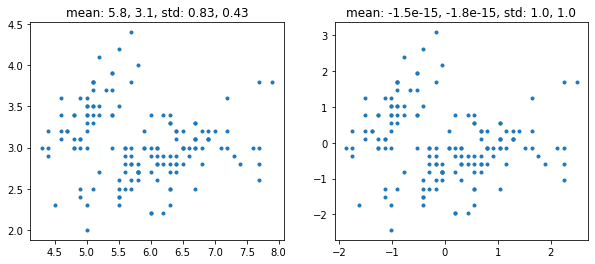

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

# 데이터를 가져와 StandardScaler로 스케일링 하세요
iris = load_iris()
data = iris.data
mm_scaled =  StandardScaler().fit_transform(data)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(data[:, 0], data[:, 1], '.')
plt.title(f'mean: {data[:,0].mean():.2}, {data[:,1].mean():.2}, std: {data[:,0].std():.2}, {data[:,1].std():.2}')
plt.subplot(1, 2, 2)
plt.plot(mm_scaled[:,0], mm_scaled[:, 1], '.')
plt.title(f'mean: {mm_scaled[:,0].mean():.2}, {mm_scaled[:,1].mean():.2}, std: {mm_scaled[:,0].std():.2}, {mm_scaled[:,1].std():.2}')
plt.show()
# 동일한 분포이지만 scale이 달라짐

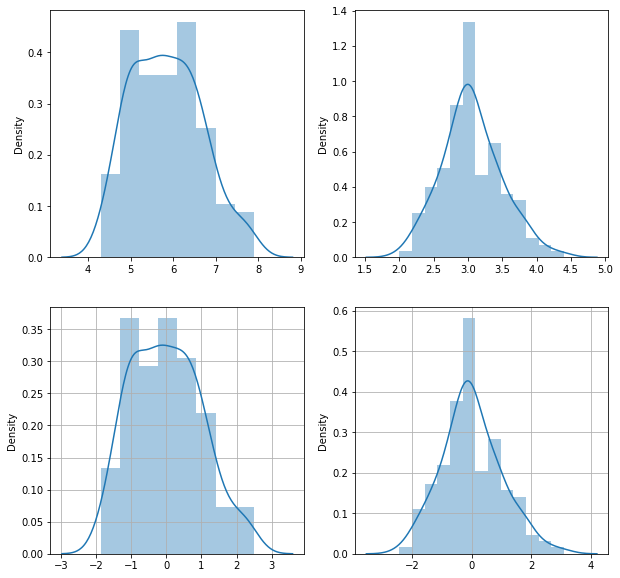

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

# 데이터를 가져와 StandardScaler로 스케일링 하세요
iris = load_iris()
data = iris.data
mm_scaled =  StandardScaler().fit_transform(data)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.distplot(data[:, 0])
plt.subplot(2, 2, 2)
sns.distplot(data[:, 1])
plt.subplot(2, 2, 3)
sns.distplot(mm_scaled[:, 0])
plt.grid(True)
plt.subplot(2, 2, 4)
sns.distplot(mm_scaled[:, 1])
plt.grid()
plt.show()


In [ ]:
# 위의 코드를 for statement를 사용하여 수정해 보세요!

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

iris = load_iris()
data = iris.data
mm_scaled =  StandardScaler().fit_transform(data)

# 이곳에 작성하세요!
plt.figure(figsize=(10,10))

plt.show()
# 10, 2 라는 숫자도 이름을 붙여서 식으로 사용하는 것이 좋음

In [ ]:
# 위의 코드를 for statement를 사용하여 수정해 보세요!

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

iris = load_iris()
data = iris.data
mm_scaled =  StandardScaler().fit_transform(data)

# 이곳에 작성하세요!
plt.figure(figsize=(10,10))

plt.show()
# 10, 2 라는 숫자도 이름을 붙여서 식으로 사용하는 것이 좋음

## 3.MinMaxScaler
- 정규화(Nomalization) : 서로 다른 규모의 특징 값을 같은 규모(단위)로 통일
- MinMaxScaler : 모든 특징 값을 0 ~1 사이로 변환, 표준 정규분포 
- sklearn.preprocessing.MinMaxScaler(feature_range)
   - feature_range = (0, 1)
   - 정규화 목표 구간 : tuple => (min, max)
   - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
# np를 사용하여 데이터 생성
import numpy as np
arr = np.array([2, 8, 10], dtype=np.float32)
arr

In [ ]:
# 식에 의한 정규화 : min,max 스케일링
(arr - arr.min()) / (arr.max() - arr.min())

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler에 의한 스케일링
mm_scaler = 
scaled

array([[0.  ],
       [0.75],
       [1.  ]], dtype=float32)

## 4.iris 데이터 스케일링 - MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

# iris 데이터 셋 가져오기
iris = 
data = 

# data 타입이 ndarray입니다.  첫 3개 데이터를 출력해 보세요.


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
# MinMaxScaler를 사용하여 data를 스케일링 하고, mm_scaled로 저장 후 3개 데이터 출력
mm_scaler = 


mm_scaled[:3]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667]])

In [ ]:
# MinMaxScaler 사용하는 다른 방법
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data)

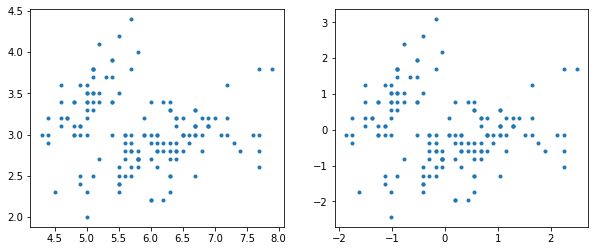

In [ ]:
# 그래프를 그려 차이를 확인합니다.
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(data[:, 0], data[:, 1], '.')
plt.subplot(1, 2, 2)
plt.plot(mm_scaled[:,0], mm_scaled[:, 1], '.')
plt.show()

In [ ]:
# 평균과 표준편차를 구해 변경 상태를 확인합니다.
print(f'mean = {mm_scaled.mean():.2f}, std = {mm_scaled.std():.2f}')

mean = -0.00, std = 1.00


## 5.그외 스케일러 

### 5-01. RobustScaler
- 중앙값 = 0/ IQR = 1
   - IQR : Q3 - Q1
- 이상치(outlier) 영향을 최소화
- 더 넓게 분포


In [ ]:
from sklearn.preprocessing import RobusterScaler

# 중앙값 0 / IQR 1
scaler = RobusterScaler()

### 5-02. MaxAbsScaler
- 0을 기준으로 절대값이 가장 큰 수가 1 또는 -1이 되도록 변환

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# 절대값
scaler = MaxAbsScaler()